In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

In [3]:
df

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN,NaN


In [4]:
df = df.loc[:,['data','totale_casi']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x.replace("T", " "), FMT) - datetime.strptime("2020-01-01 00:00:00", FMT)).days  )

# The logistic model

In [5]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [6]:
#We can use the curve_fit function of scipy library to estimate the parameter values and errors starting from the original data.
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])

In [7]:
a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

In [8]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

In [9]:
errors

[0.06897646003515234, 0.1460696728594506, 1384.5167035301424]

In [10]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

In [11]:
sol

152

# Exponential model

In [12]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [13]:
#del a,b,c

In [14]:
exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1],maxfev=2000)

In [15]:
base = datetime.strptime(date[-1:].values[0].replace("T"," "),"%Y-%m-%d %H:%M:%S")
print(base)

2020-04-02 17:00:00


In [16]:
dates = []
for i_date in date:
    dates.append(datetime.strptime(i_date.replace("T"," "),"%Y-%m-%d %H:%M:%S"))

In [17]:
dates

[datetime.datetime(2020, 2, 24, 18, 0),
 datetime.datetime(2020, 2, 25, 18, 0),
 datetime.datetime(2020, 2, 26, 18, 0),
 datetime.datetime(2020, 2, 27, 18, 0),
 datetime.datetime(2020, 2, 28, 18, 0),
 datetime.datetime(2020, 2, 29, 18, 0),
 datetime.datetime(2020, 3, 1, 18, 0),
 datetime.datetime(2020, 3, 2, 18, 0),
 datetime.datetime(2020, 3, 3, 18, 0),
 datetime.datetime(2020, 3, 4, 18, 0),
 datetime.datetime(2020, 3, 5, 18, 0),
 datetime.datetime(2020, 3, 6, 18, 0),
 datetime.datetime(2020, 3, 7, 18, 0),
 datetime.datetime(2020, 3, 8, 18, 0),
 datetime.datetime(2020, 3, 9, 18, 0),
 datetime.datetime(2020, 3, 10, 18, 0),
 datetime.datetime(2020, 3, 11, 17, 0),
 datetime.datetime(2020, 3, 12, 17, 0),
 datetime.datetime(2020, 3, 13, 17, 0),
 datetime.datetime(2020, 3, 14, 17, 0),
 datetime.datetime(2020, 3, 15, 17, 0),
 datetime.datetime(2020, 3, 16, 17, 0),
 datetime.datetime(2020, 3, 17, 17, 0),
 datetime.datetime(2020, 3, 18, 17, 0),
 datetime.datetime(2020, 3, 19, 17, 0),
 datetime

In [18]:
date_list_pred = [base + timedelta(days=i_x) for i_x in range(1,sol)]
date_list = []
for i_date in dates:
    date_list.append(i_date)
for i_date in date_list_pred:
    date_list.append(i_date)

In [19]:
date_list

[datetime.datetime(2020, 2, 24, 18, 0),
 datetime.datetime(2020, 2, 25, 18, 0),
 datetime.datetime(2020, 2, 26, 18, 0),
 datetime.datetime(2020, 2, 27, 18, 0),
 datetime.datetime(2020, 2, 28, 18, 0),
 datetime.datetime(2020, 2, 29, 18, 0),
 datetime.datetime(2020, 3, 1, 18, 0),
 datetime.datetime(2020, 3, 2, 18, 0),
 datetime.datetime(2020, 3, 3, 18, 0),
 datetime.datetime(2020, 3, 4, 18, 0),
 datetime.datetime(2020, 3, 5, 18, 0),
 datetime.datetime(2020, 3, 6, 18, 0),
 datetime.datetime(2020, 3, 7, 18, 0),
 datetime.datetime(2020, 3, 8, 18, 0),
 datetime.datetime(2020, 3, 9, 18, 0),
 datetime.datetime(2020, 3, 10, 18, 0),
 datetime.datetime(2020, 3, 11, 17, 0),
 datetime.datetime(2020, 3, 12, 17, 0),
 datetime.datetime(2020, 3, 13, 17, 0),
 datetime.datetime(2020, 3, 14, 17, 0),
 datetime.datetime(2020, 3, 15, 17, 0),
 datetime.datetime(2020, 3, 16, 17, 0),
 datetime.datetime(2020, 3, 17, 17, 0),
 datetime.datetime(2020, 3, 18, 17, 0),
 datetime.datetime(2020, 3, 19, 17, 0),
 datetime

In [20]:
print(len(date_list))
print(len([logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in range(0+min(x),len(date_list)+min(x))]))

190
190


In [21]:
print(date_list)


[datetime.datetime(2020, 2, 24, 18, 0), datetime.datetime(2020, 2, 25, 18, 0), datetime.datetime(2020, 2, 26, 18, 0), datetime.datetime(2020, 2, 27, 18, 0), datetime.datetime(2020, 2, 28, 18, 0), datetime.datetime(2020, 2, 29, 18, 0), datetime.datetime(2020, 3, 1, 18, 0), datetime.datetime(2020, 3, 2, 18, 0), datetime.datetime(2020, 3, 3, 18, 0), datetime.datetime(2020, 3, 4, 18, 0), datetime.datetime(2020, 3, 5, 18, 0), datetime.datetime(2020, 3, 6, 18, 0), datetime.datetime(2020, 3, 7, 18, 0), datetime.datetime(2020, 3, 8, 18, 0), datetime.datetime(2020, 3, 9, 18, 0), datetime.datetime(2020, 3, 10, 18, 0), datetime.datetime(2020, 3, 11, 17, 0), datetime.datetime(2020, 3, 12, 17, 0), datetime.datetime(2020, 3, 13, 17, 0), datetime.datetime(2020, 3, 14, 17, 0), datetime.datetime(2020, 3, 15, 17, 0), datetime.datetime(2020, 3, 16, 17, 0), datetime.datetime(2020, 3, 17, 17, 0), datetime.datetime(2020, 3, 18, 17, 0), datetime.datetime(2020, 3, 19, 17, 0), datetime.datetime(2020, 3, 20, 17

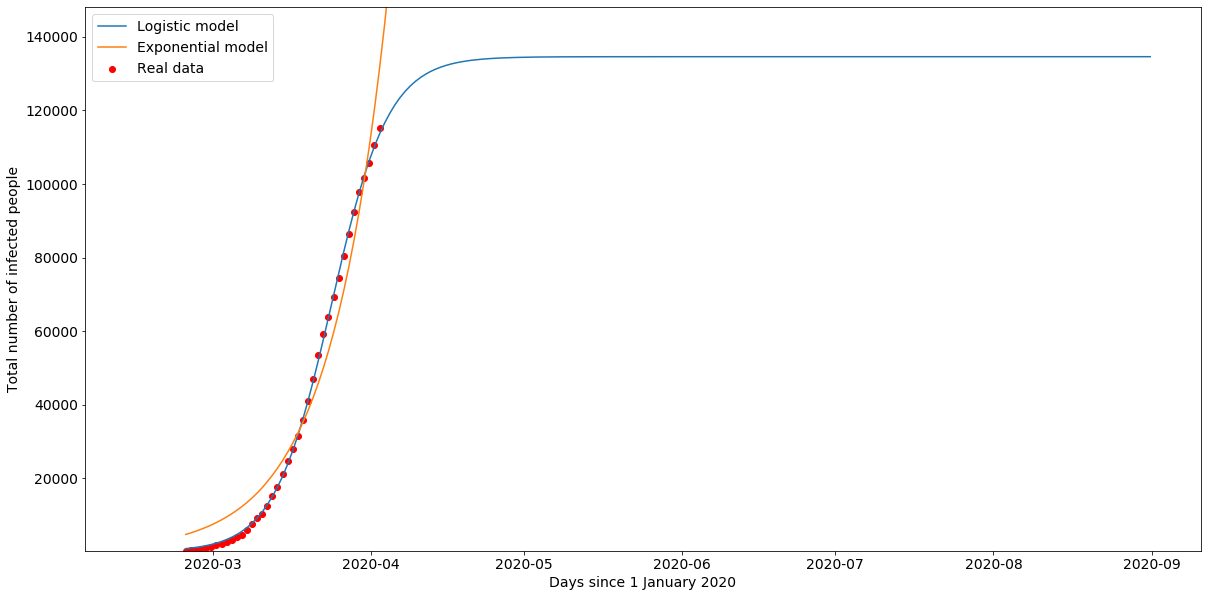

In [22]:
fig = plt.figure(figsize=(20,10))

pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(dates,y,label="Real data",color="red")
# Predicted logistic curve
plt.plot(date_list, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in range(0+min(x),len(date_list)+min(x))], label="Logistic model" )
# Predicted exponential curve
plt.plot(date_list, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in range(0+min(x),len(date_list)+min(x))], label="Exponential model" )
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

# Facebook prophet model

In [23]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

In [24]:
df.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'note_it', 'note_en'],
      dtype='object')

In [25]:
df_prophet = df[['data', 'totale_casi']]
df_prophet.columns = ['ds', 'y']
df_prophet

,ds,y
0,2020-02-24T18:00:00,229
1,2020-02-25T18:00:00,322
2,2020-02-26T18:00:00,400
3,2020-02-27T18:00:00,650
4,2020-02-28T18:00:00,888
5,2020-02-29T18:00:00,1128
6,2020-03-01T18:00:00,1694
7,2020-03-02T18:00:00,2036
8,2020-03-03T18:00:00,2502
9,2020-03-04T18:00:00,3089


# TODO - the crucial thing is to work out the capacity c

In [26]:
m = Prophet(growth = 'logistic')
df_prophet['cap'] = c
m.fit(df_prophet)

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [27]:
future = m.make_future_dataframe(periods=90)
future['cap'] = c
future.tail()

,ds,cap
124,2020-06-27 17:00:00,134639.444039
125,2020-06-28 17:00:00,134639.444039
126,2020-06-29 17:00:00,134639.444039
127,2020-06-30 17:00:00,134639.444039
128,2020-07-01 17:00:00,134639.444039


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
124,2020-06-27 17:00:00,135617.270134,134999.327015,136310.597854
125,2020-06-28 17:00:00,135775.273438,135102.346992,136409.390528
126,2020-06-29 17:00:00,135401.596706,134755.294659,136081.301663
127,2020-06-30 17:00:00,135028.296440,134412.646894,135670.560926
128,2020-07-01 17:00:00,134844.858110,134204.089870,135527.454060


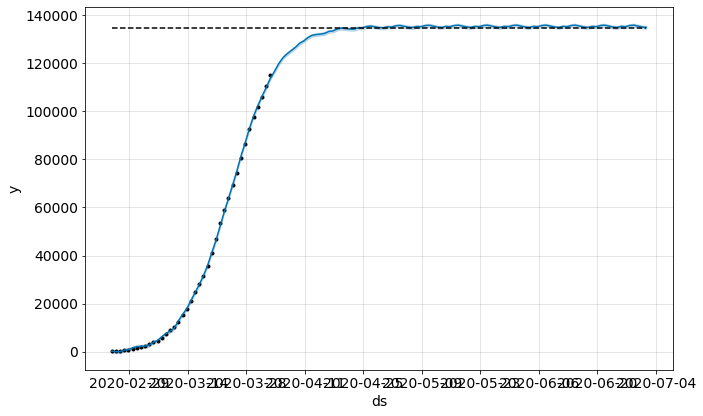

In [29]:
# Python
fig1 = m.plot(forecast)